In [1]:
import pandas as pd
from plot_params import *
import pandas as pd
data=pd.read_csv(outdir / 'Mouse_annotated.csv.gz')

outdir = Path('/tscc/nfs/home/hsher/ps-yeolab5/karen_data/eclip_model_scores/output/')
for f in outdir.glob('*.score.csv'):
    name = f.name.split('.')[0]
    df = pd.read_csv(f,
                    index_col = 0)
    df.set_index('ID', inplace = True)
    df.rename({'dlogodds_pred': name}, axis = 1, inplace = True)


    data[name]=df[name]

/tscc/nfs/home/hsher/miniconda3/envs/my_metadensity/lib/python3.7/site-packages/ipykernel_launcher.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  from ipykernel import kernelapp as app


In [2]:
data['annotation']=data.apply(
    lambda row: 'UTR5' if row['start_annotation']=='UTR5' and row['end_annotation']=='UTR5' else
     'UTR3' if row['start_annotation']=='UTR3' and row['end_annotation']=='UTR3' else 'CDS', axis = 1)

In [3]:
# data.to_csv(outdir / 'Mouse_annotated_RBPNet.csv.gz')

<AxesSubplot:>

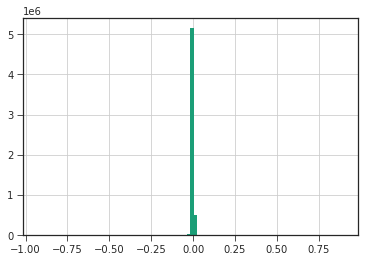

In [4]:
data['difference'].hist(bins = 100)

In [5]:
import numpy as np
data['difference_bin'] = pd.cut(data['difference'], bins = [-np.inf, -0.1, 0.1, np.inf],
                               labels = ['<-0.1', 'middle', '>0.1'])

In [6]:
name

'ZNF800_K562_ENCSR586DGV'

<AxesSubplot:xlabel='annotation', ylabel='SFPQ_HepG2_ENCSR965DLL'>

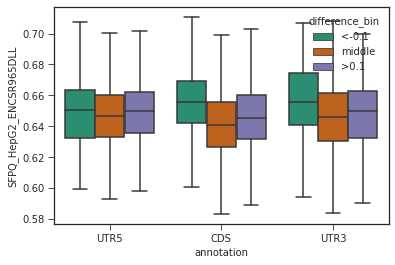

In [7]:
sns.boxplot(data, x = 'annotation', y = 'SFPQ_HepG2_ENCSR965DLL', hue = 'difference_bin', showfliers=False)

In [8]:
data['difference_bin']

0          middle
1          middle
2          middle
3          middle
4          middle
            ...  
5722825    middle
5722826    middle
5722827    middle
5722828    middle
5722829    middle
Name: difference_bin, Length: 5722830, dtype: category
Categories (3, object): ['<-0.1' < 'middle' < '>0.1']

In [9]:
from scipy.stats import ks_2samp
stat = []
for exp in data.columns[9:-2]:
    for annotation in ['UTR5', 'CDS', 'UTR3']:
        for cat in ['<-0.1', '>0.1']:
            ks, pv = ks_2samp(data.loc[(data['annotation']==annotation)&
                                        (data['difference_bin']==cat),
                                        exp], 
                                        data.loc[(data['annotation']==annotation)&
                                        (data['difference_bin']=='middle'),
                                        exp], alternative='two-sided')
            stat.append([ks, pv, exp, cat, annotation])
        
    

In [10]:
stat = pd.DataFrame(stat, columns = ['KS statistics', 'pvalue', 'RBPNet_model', 'category', 'annotation'])

In [11]:
stat

,KS statistics,pvalue,RBPNet_model,category,annotation
0,0.028681,6.832860e-01,DDX41_K562_5081,<-0.1,UTR5
1,0.034531,7.661756e-01,DDX41_K562_5081,>0.1,UTR5
2,0.046089,1.816721e-28,DDX41_K562_5081,<-0.1,CDS
3,0.029865,1.954611e-02,DDX41_K562_5081,>0.1,CDS
4,0.186890,5.382955e-08,DDX41_K562_5081,<-0.1,UTR3
...,...,...,...,...,...
1033,0.061878,1.189826e-01,ZNF800_K562_ENCSR586DGV,>0.1,UTR5
1034,0.132168,9.502480e-232,ZNF800_K562_ENCSR586DGV,<-0.1,CDS
1035,0.030986,1.372807e-02,ZNF800_K562_ENCSR586DGV,>0.1,CDS
1036,0.084030,5.846302e-02,ZNF800_K562_ENCSR586DGV,<-0.1,UTR3


In [12]:
stat.sort_values(by = 'pvalue')

,KS statistics,pvalue,RBPNet_model,category,annotation
518,0.276152,0.000000,SFPQ_HepG2_ENCSR965DLL,<-0.1,CDS
824,0.238017,0.000000,PTBP1_K562_ENCSR981WKN,<-0.1,CDS
338,0.337973,0.000000,NONO_K562_4001,<-0.1,CDS
980,0.189231,0.000000,GTF2F1_HepG2_ENCSR265ZIS,<-0.1,CDS
104,0.263543,0.000000,PRPF39_HepG2_4149,<-0.1,CDS
...,...,...,...,...,...
967,0.028519,0.921011,NONO_HepG2_4084,>0.1,UTR5
31,0.028510,0.921193,PRK2_K562_5064,>0.1,UTR5
858,0.020811,0.948288,SF3B4_K562_ENCSR267OLV,<-0.1,UTR5
288,0.020661,0.951202,PDCD4_K562_5075,<-0.1,UTR5


In [13]:
stat

,KS statistics,pvalue,RBPNet_model,category,annotation
0,0.028681,6.832860e-01,DDX41_K562_5081,<-0.1,UTR5
1,0.034531,7.661756e-01,DDX41_K562_5081,>0.1,UTR5
2,0.046089,1.816721e-28,DDX41_K562_5081,<-0.1,CDS
3,0.029865,1.954611e-02,DDX41_K562_5081,>0.1,CDS
4,0.186890,5.382955e-08,DDX41_K562_5081,<-0.1,UTR3
...,...,...,...,...,...
1033,0.061878,1.189826e-01,ZNF800_K562_ENCSR586DGV,>0.1,UTR5
1034,0.132168,9.502480e-232,ZNF800_K562_ENCSR586DGV,<-0.1,CDS
1035,0.030986,1.372807e-02,ZNF800_K562_ENCSR586DGV,>0.1,CDS
1036,0.084030,5.846302e-02,ZNF800_K562_ENCSR586DGV,<-0.1,UTR3


In [14]:
#https://www.syngoportal.org/gene_hgnc10774
#SynpatomeDB, synsysnet, integrated synapse proteome

<AxesSubplot:>

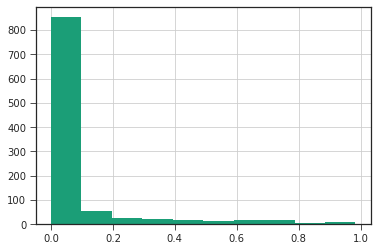

In [15]:
stat['pvalue'].hist()

<AxesSubplot:xlabel='ZNF800_K562_ENCSR586DGV', ylabel='difference'>

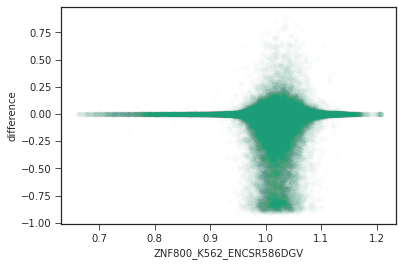

In [16]:
data.plot.scatter(x = name, y = 'difference', alpha = 0.01)

In [17]:
data.plot.scatter(x = name, y = 'difference', alpha = 0.01, hue = ')

SyntaxError: EOL while scanning string literal (670594129.py, line 1)